In [58]:
import nltk
import pandas as pd
from nltk.corpus import stopwords  # Importing Natural Language Toolkit

messages=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Trigram_Combine NEW sent pol .csv',header=None,names=["sentiment","text","polarity","repetations"])
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer


In [59]:
#descriptions
print(messages.describe())

           polarity   repetations
count  58041.000000  58041.000000
mean       0.019550      1.304750
std        0.173154      4.239845
min       -1.000000      1.000000
25%        0.000000      1.000000
50%        0.000000      1.000000
75%        0.000000      1.000000
max        1.000000    331.000000


In [60]:
# class distribution
print(messages.groupby('sentiment').size())

sentiment
negative     4327
neutral     45680
positive     8034
dtype: int64


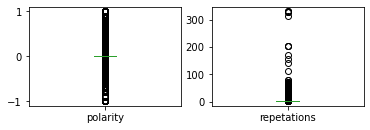

In [61]:
from matplotlib import pyplot
messages.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

In [62]:
messages['text']

0                red nviolets blue
1                nviolets blue got
2        valentinesday covid roses
3                  covid roses red
4               roses red nviolets
                   ...            
58036               watch says top
58037              says top health
58038          top health official
58039        health official covid
58040        official covid odisha
Name: text, Length: 58041, dtype: object

In [63]:
from nltk.corpus import stopwords  # Importing Natural Language Toolkit
from nltk.stem import WordNetLemmatizer
import re
corpus = []
lemmatizer = WordNetLemmatizer()
 
    

for i in range(0,len(messages['text'])):
    
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.split()
  
    review = [lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    non_word=['n','rt','xe','xa','xc','co','xf','xxd','xs','x','nx','ni','nfor','nhow','eh','de''amo','nis','wa']
    review=[e for e in review if e not in non_word]
    
    corpus.append(review)
   

In [64]:
corpus

[['red', 'nviolets', 'blue'],
 ['nviolets', 'blue', 'got'],
 ['valentinesday', 'covid', 'rose'],
 ['covid', 'rose', 'red'],
 ['rose', 'red', 'nviolets'],
 ['blue', 'got', 'vaccine'],
 ['gmt', 'coronavirus', 'coronavirusupdate'],
 ['coronavirus', 'coronavirusupdate', 'covid'],
 ['coronavirusupdate', 'covid', 'coronaviruspandemi'],
 ['new', 'covid', 'case'],
 ['new', 'case', 'new'],
 ['case', 'new', 'death'],
 ['xx', 'xx', 'xx'],
 ['report', 'new', 'covid'],
 ['confirmed', 'covid', 'case'],
 ['covid', 'insight', 'analytics'],
 ['total', 'confirmed', 'covid'],
 ['insight', 'analytics', 'team'],
 ['covid', 'case', 'county'],
 ['analytics', 'team', 'usafacts'],
 ['case', 'ndeaths', 'nrecovered'],
 ['ndeaths', 'nrecovered', 'nactive'],
 ['nrecovered', 'nactive', 'case'],
 ['coronavirus', 'covid', 'covid'],
 ['covid', 'vax', 'administered'],
 ['vax', 'administered', 'current'],
 ['administered', 'current', 'rate'],
 ['tested', 'positive', 'covid'],
 ['covid', 'case', 'recovery'],
 ['death', '

In [65]:
X=[]
for i in range (len(corpus)):
    c=''.join([str(elem+" ") for elem in corpus[i]])
    X.append(c)


In [66]:
X

['red nviolets blue ',
 'nviolets blue got ',
 'valentinesday covid rose ',
 'covid rose red ',
 'rose red nviolets ',
 'blue got vaccine ',
 'gmt coronavirus coronavirusupdate ',
 'coronavirus coronavirusupdate covid ',
 'coronavirusupdate covid coronaviruspandemi ',
 'new covid case ',
 'new case new ',
 'case new death ',
 'xx xx xx ',
 'report new covid ',
 'confirmed covid case ',
 'covid insight analytics ',
 'total confirmed covid ',
 'insight analytics team ',
 'covid case county ',
 'analytics team usafacts ',
 'case ndeaths nrecovered ',
 'ndeaths nrecovered nactive ',
 'nrecovered nactive case ',
 'coronavirus covid covid ',
 'covid vax administered ',
 'vax administered current ',
 'administered current rate ',
 'tested positive covid ',
 'covid case recovery ',
 'death last hour ',
 'new covid data ',
 'est coronavirus covid ',
 'current rate kvax ',
 'rate kvax day ',
 'nactive case ncompleted ',
 'case recovery death ',
 'president venkaiah naidu ',
 'recovery death last

In [67]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [68]:
w=messages['sentiment']

In [69]:
#training dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)
import time
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("MultinomialNB accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)



 time taken by method is 0.13145065307617188 sec
[[ 543  312   28]
 [   3 9088   23]
 [   8  374 1230]]
MultinomialNB accuracy is = 0.9355672323197519
              precision    recall  f1-score   support

    negative       0.98      0.61      0.76       883
     neutral       0.93      1.00      0.96      9114
    positive       0.96      0.76      0.85      1612

    accuracy                           0.94     11609
   macro avg       0.96      0.79      0.86     11609
weighted avg       0.94      0.94      0.93     11609



In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.naive_bayes import GaussianNB
spam_detect_model=GaussianNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("GaussianNB accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.7707846164703369 sec
[[ 832   15   36]
 [6920 1678  516]
 [ 938   33  641]]
GaussianNB accuracy is = 0.2714273408562322
              precision    recall  f1-score   support

    negative       0.10      0.94      0.17       883
     neutral       0.97      0.18      0.31      9114
    positive       0.54      0.40      0.46      1612

    accuracy                           0.27     11609
   macro avg       0.54      0.51      0.31     11609
weighted avg       0.85      0.27      0.32     11609



In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.naive_bayes import BernoulliNB
spam_detect_model=BernoulliNB().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

#from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("BernoulliNB accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.24736905097961426 sec
[[ 544  311   28]
 [   4 9086   24]
 [   8  374 1230]]
BernoulliNB accuracy is = 0.9354810922560083
              precision    recall  f1-score   support

    negative       0.98      0.62      0.76       883
     neutral       0.93      1.00      0.96      9114
    positive       0.96      0.76      0.85      1612

    accuracy                           0.94     11609
   macro avg       0.96      0.79      0.86     11609
weighted avg       0.94      0.94      0.93     11609



In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
spam_detect_model=LogisticRegression(multi_class='ovr').fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LogisticRegression accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.16926193237304688 sec
[[ 548  307   28]
 [   8 9084   22]
 [   7  366 1239]]
LogisticRegression accuracy is = 0.9364286329571884
              precision    recall  f1-score   support

    negative       0.97      0.62      0.76       883
     neutral       0.93      1.00      0.96      9114
    positive       0.96      0.77      0.85      1612

    accuracy                           0.94     11609
   macro avg       0.96      0.80      0.86     11609
weighted avg       0.94      0.94      0.93     11609



In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.tree import DecisionTreeClassifier
spam_detect_model=DecisionTreeClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("DecisionTreeClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.08083486557006836 sec
[[ 566  292   25]
 [ 111 8926   77]
 [  26  356 1230]]
DecisionTreeClassifier accuracy is = 0.9235937634593849
              precision    recall  f1-score   support

    negative       0.81      0.64      0.71       883
     neutral       0.93      0.98      0.96      9114
    positive       0.92      0.76      0.84      1612

    accuracy                           0.92     11609
   macro avg       0.89      0.79      0.83     11609
weighted avg       0.92      0.92      0.92     11609



In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.neighbors import KNeighborsClassifier

spam_detect_model=KNeighborsClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("KNeighborsClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 665.5684192180634 sec
[[ 342  522   19]
 [  73 9014   27]
 [  30  751  831]]
KNeighborsClassifier accuracy is = 0.8775088293565337
              precision    recall  f1-score   support

    negative       0.77      0.39      0.52       883
     neutral       0.88      0.99      0.93      9114
    positive       0.95      0.52      0.67      1612

    accuracy                           0.88     11609
   macro avg       0.86      0.63      0.70     11609
weighted avg       0.88      0.88      0.86     11609



In [86]:
#bag of words converting X in vector numbers
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100)
Y=cv.fit_transform(X).toarray()

#y_score(y_test,y_pred)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X_train, y_train)


start=time.time()
y_pred= model.predict(X_test)
#model=model.decision_function(X_test)
#=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LinearDiscriminantAnalysis accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

MemoryError: Unable to allocate 35.4 MiB for an array with shape (46432, 100) and data type float64

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.svm import LinearSVC

spam_detect_model=LinearSVC().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("LinearSVC accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0065097808837890625 sec
[[ 139  731   13]
 [   0 9111    3]
 [   1 1034  577]]
LinearSVC accuracy is = 0.8464984064088208
              precision    recall  f1-score   support

    negative       0.99      0.16      0.27       883
     neutral       0.84      1.00      0.91      9114
    positive       0.97      0.36      0.52      1612

    accuracy                           0.85     11609
   macro avg       0.93      0.51      0.57     11609
weighted avg       0.87      0.85      0.81     11609



In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.svm import SVC

spam_detect_model= SVC().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("SVC accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 31.605781078338623 sec
[[ 132  737   14]
 [   1 9107    6]
 [   1 1045  566]]
SVC accuracy is = 0.8446033250064605
              precision    recall  f1-score   support

    negative       0.99      0.15      0.26       883
     neutral       0.84      1.00      0.91      9114
    positive       0.97      0.35      0.52      1612

    accuracy                           0.84     11609
   macro avg       0.93      0.50      0.56     11609
weighted avg       0.87      0.84      0.81     11609



In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.ensemble import AdaBoostClassifier

spam_detect_model=AdaBoostClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("AdaBoostClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.3320143222808838 sec
[[ 139  731   13]
 [   0 9111    3]
 [   1 1034  577]]
AdaBoostClassifier accuracy is = 0.8464984064088208
              precision    recall  f1-score   support

    negative       0.99      0.16      0.27       883
     neutral       0.84      1.00      0.91      9114
    positive       0.97      0.36      0.52      1612

    accuracy                           0.85     11609
   macro avg       0.93      0.51      0.57     11609
weighted avg       0.87      0.85      0.81     11609



In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import RidgeClassifier
spam_detect_model=RidgeClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("RidgeClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0 sec
[[ 139  731   13]
 [   0 9111    3]
 [   1 1034  577]]
RidgeClassifier accuracy is = 0.8464984064088208
              precision    recall  f1-score   support

    negative       0.99      0.16      0.27       883
     neutral       0.84      1.00      0.91      9114
    positive       0.97      0.36      0.52      1612

    accuracy                           0.85     11609
   macro avg       0.93      0.51      0.57     11609
weighted avg       0.87      0.85      0.81     11609



In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import PassiveAggressiveClassifier
spam_detect_model=PassiveAggressiveClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("PassiveAggressiveClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0 sec
[[ 139  731   13]
 [   1 9097   16]
 [   1 1033  578]]
PassiveAggressiveClassifier accuracy is = 0.8453785855801533
              precision    recall  f1-score   support

    negative       0.99      0.16      0.27       883
     neutral       0.84      1.00      0.91      9114
    positive       0.95      0.36      0.52      1612

    accuracy                           0.85     11609
   macro avg       0.93      0.50      0.57     11609
weighted avg       0.86      0.85      0.81     11609



In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.linear_model import Perceptron
spam_detect_model=Perceptron().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
#from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Perceptron accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.0 sec
[[ 142  727   14]
 [  37 9053   24]
 [  10 1021  581]]
Perceptron accuracy is = 0.8421052631578947
              precision    recall  f1-score   support

    negative       0.75      0.16      0.26       883
     neutral       0.84      0.99      0.91      9114
    positive       0.94      0.36      0.52      1612

    accuracy                           0.84     11609
   macro avg       0.84      0.50      0.56     11609
weighted avg       0.85      0.84      0.81     11609



In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,w,test_size=0.2,random_state=0)

from sklearn.neural_network import MLPClassifier
spam_detect_model=MLPClassifier().fit(X_train,y_train)

start=time.time()
y_pred=spam_detect_model.predict(X_test)
end=time.time()
print(" time taken by method is", end-start,"sec")

from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
print(confusion_m)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("MLPClassifier accuracy is =",accuracy)
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

 time taken by method is 0.062478065490722656 sec
[[ 137  731   15]
 [   3 9091   20]
 [   2 1030  580]]
MLPClassifier accuracy is = 0.8448617451976914
              precision    recall  f1-score   support

    negative       0.96      0.16      0.27       883
     neutral       0.84      1.00      0.91      9114
    positive       0.94      0.36      0.52      1612

    accuracy                           0.84     11609
   macro avg       0.92      0.50      0.57     11609
weighted avg       0.86      0.84      0.81     11609



In [95]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,1].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10    positive
11    positive
12     neutral
13    positive
14    positive
15     neutral
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0], dtype=uint8)

Accuracy of the LR model is for neutral class 0.8477043673012318
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.719


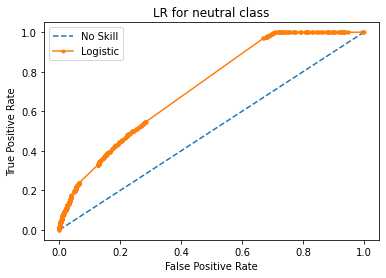

In [96]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


Accuracy of the LR model is for neutral class 0.8477043673012318
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.646


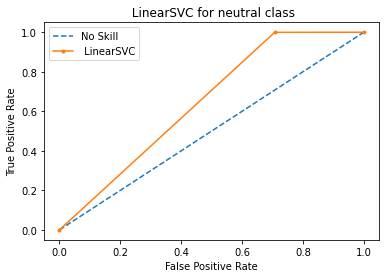

In [97]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for neutral class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [98]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,2].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10    positive
11    positive
12     neutral
13    positive
14    positive
15     neutral
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=uint8)

Accuracy of the LR model is for positive class 0.9094667930054269
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.745


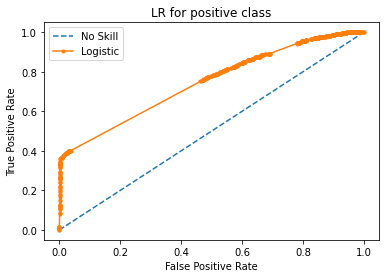

In [99]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the LinearSVC model is for positive class 0.9094667930054269
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.678


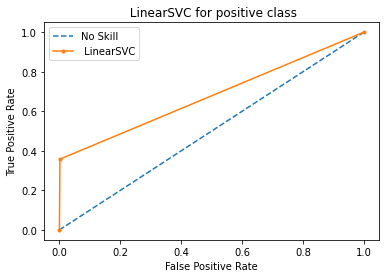

In [100]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LinearSVC model is for positive class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for positive class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [101]:
print(w.head(20))
#spam colunfor neutal value will be 1 for positive value will be 2 and for negative value will be 0
q=pd.get_dummies(w)
q=q.iloc[:,0].values
q[0:14]

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
5      neutral
6      neutral
7      neutral
8      neutral
9     positive
10    positive
11    positive
12     neutral
13    positive
14    positive
15     neutral
16    positive
17     neutral
18     neutral
19     neutral
Name: sentiment, dtype: object


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

Accuracy of the LR model is for negative class 0.9358256525109828
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.670


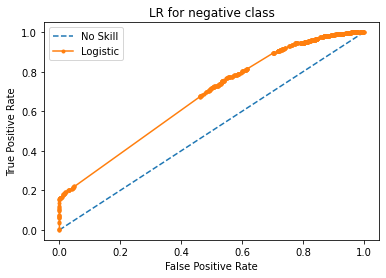

In [102]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression(multi_class='ovr')
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for negative class", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title("LR for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the LR model is for neutral class 0.9358256525109828
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.579


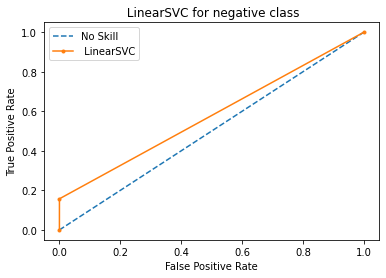

In [103]:
# roc curve and auc
#from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LinearSVC()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the LR model is for neutral class", accuracy)
# predict probabilities
lr_probs = model.predict(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.title(" LinearSVC for negative class")
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' LinearSVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Accuracy of the MLP  negative model is 0.9353949521922647
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.668


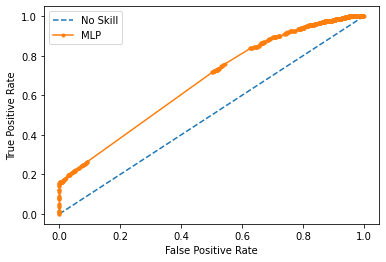

In [104]:
# roc curve and auc
#from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
# generate 2 class dataset

# split into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Y,q,test_size=0.2,random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = MLPClassifier()
detect=model.fit(X_train, y_train)
y_pred=detect.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the MLP  negative model is", accuracy)
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores



ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()